# Parte 1 - Análisis de Archivos de Texto

In [1]:
# Importamos las librerias
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_chars_from_txt_file(file_name: str) -> dict:
    """
    Función que toma un archivo de texto y lee todos los caracteres en él
    Devuelve un dict con la cantidad de ocurrencias de cada símbolo
    Vamos a considerar todos los simbolos
    - Mayusculas
    - Minusculas
    - Signos de puntuación
    - Salto de línea (caracteres especiales)
    - Espacio en blanco
    """
    characters = {}
    # Vamos a usar esto para identificar caracteres "especiales" como " " y "\n"
    single_char = None
    # Leemos cada linea del archivo, y por cada linea del archivo vamos a leer cada caracter e insertarlo un contador en un dict
    # Entonces se vera algo asi como: {"a": 3, "b": 5, "\n": 11...}
    with open(file_name, "r") as f:
        for line in f:
            for char in line:
                if char == ' ':
                    single_char = "space"
                elif char == '\n':
                    single_char = "salto_linea"
                else:
                    single_char = char
                if single_char not in characters:
                    characters[single_char] = 1
                else:
                    characters[single_char] += 1
    return characters

def print_frec_table(char_dict: dict) -> pd.DataFrame:
    """
    Función que toma un dict e imprime la frecuencia y probabilidad de cada uno de los caracteres en él
    """
    char_count_tot = sum(char_dict.values())
    diff_char_count = len(char_dict.keys())
    print(f"Tenemos en total {char_count_tot} caracteres y simbolos y {diff_char_count} caracteres y simbolos diferentes en el mismo\n")
    print("Tabla con la frecuencia de aparición de cada caracteres y simbolos:\n")
    
    # Seteamos pandas para mostrar todas las filas
    pd.set_option('display.max_rows', diff_char_count)
    header = ("Caracter", "Frecuencia", "Probabilidad", "Probabilidad (%)")
    return pd.DataFrame([[symbol, frec, f"{frec / char_count_tot:.2f}", f"{frec / char_count_tot * 100:.2f}%"] for symbol, frec in char_dict.items()], columns=header)

def show_histogram(char_dict: dict, width: float = 1.0) -> None:
    """
    Función que toma un dict e imprime en pantalla un histograma con la frecuencia de cada símbolo
    """
    # Agregamos un tick con un offset
    x_positions = np.arange(len(char_dict))
    
    # Cremos el bar chart plot
    fig, ax = plt.subplots(figsize=(15, 5))  # Increase figure size to make room for labels
    rects1 = ax.bar(x_positions, char_dict.values(), width=width, color='b', align='center')
    
    # Labels ejes X/Y
    ax.set_xlabel("Simbolo")
    ax.set_ylabel("Cantidad de ocurrencias")
    ax.set_title("Cantidad de apariciones por simbolo")
    ax.set_xticks(x_positions)
    ax.set_xticklabels(list(char_dict.keys()), rotation=90, fontsize=8)
    
    # Mostramos el plot
    plt.show()

def show_entropy(char_dict: dict) -> None:
    """
    Función que toma un dict e imprime en pantalla su entropía
    """
    # Utilizamos la fórmula de Shannon
    p = None
    entropia = 0
    char_count_tot = sum(char_dict.values())
    for _, frec in char_dict.items():
        # Probabilidad del símbolo
        p = frec / char_count_tot
        # Aplicamos la fórmula de Shannon
        entropia -= p * math.log2(p)
    
    print(f"La entropía es de {entropia:.4f} bits/simbolo")

def get_pixels_from_img(archivo_imagen: str, rows: int, cols: int) -> dict:
    pixels = {}
    fin = open(archivo_imagen)
    img = np.fromfile(fin, dtype = np.uint8, count = rows * cols)
    for pixel in img:
        if str(pixel) not in pixels:
            pixels[str(pixel)] = 1
        else:
            pixels[str(pixel)] += 1
    fin.close()
    return pixels


## Archivo "don-quixote.txt"

### Identificacion de caracteres en el texto "Don Qujote"


### Frecuencia de aparición de cada carácter o símbolo en el texto "Don Quijote"

In [3]:
characters: dict = get_chars_from_txt_file("don-quixote.txt")
print_frec_table(characters)

Tenemos en total 2166786 caracteres y simbolos y 71 caracteres y simbolos diferentes en el mismo

Tabla con la frecuencia de aparición de cada caracteres y simbolos:



,Caracter,Frecuencia,Probabilidad,Probabilidad (%)
0,D,4285,0.00,0.20%
1,O,2002,0.00,0.09%
2,N,1728,0.00,0.08%
3,space,372706,0.17,17.20%
4,Q,2295,0.00,0.11%
5,U,556,0.00,0.03%
6,I,8845,0.00,0.41%
7,X,398,0.00,0.02%
8,T,4859,0.00,0.22%
9,E,2778,0.00,0.13%


### Histograma de la distribución del texto "Don Quijote"

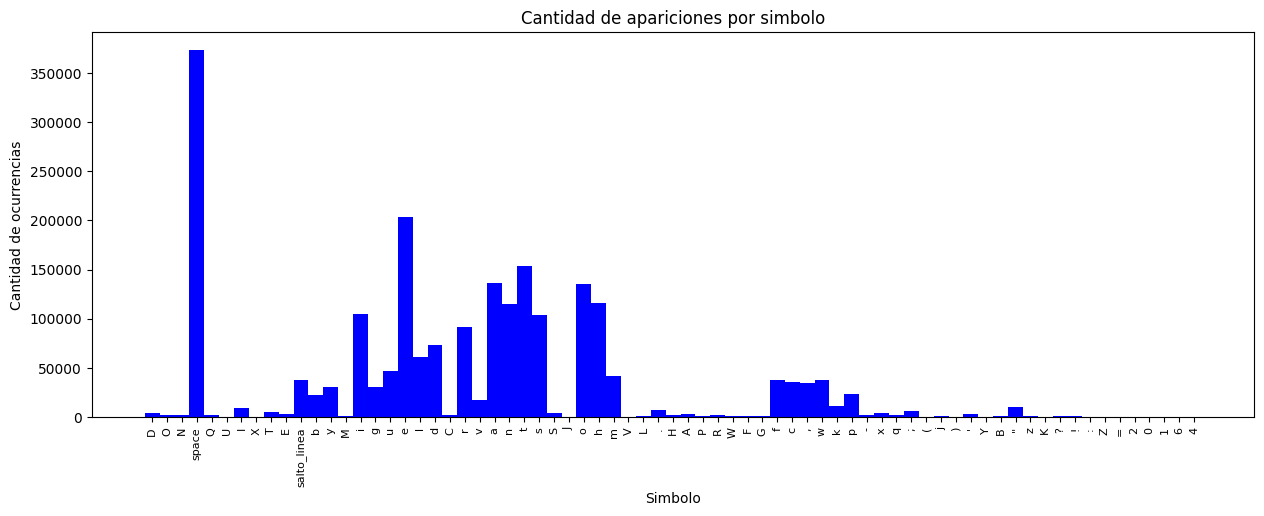

In [4]:
show_histogram(characters)

### Calculo de entropía en el texto "Don Quijote"

In [5]:
show_entropy(characters)

La entropía es de 4.4286 bits/simbolo


## Analisis de posible tasa de compresión en el texto "Don Quijote"

**Dado que la entropía del texto es 4.4286 bits/símbolo, significa que en promedio cada carácter del mismo podría representarse con ~4.42 bits en lugar de 8 bits que necesita un caracter en ASCII.**

Por lo tanto podemos suponer que la tasa de compresión estará motivada por:

```
Tasa de compresión = H(s) / L
```

Donde:
- `H(S)` es la entropía del texto (ya calculada)
- `L` es la cantidad de bits por símbolo. Dado que asumimos el uso ASCII, serán 8 bits.

Por tanto:


```
Tasa de compresión = 4.42 (bits / simbolo) / 8 bits / simbolo
```

Lo que nos dá una tasa de compresión teórica de **0.5525**.  Con lo cual en un esquema de compresión óptimo con el 55.25% de la información original podríamos representar el archivo sin pérdidas.

**En realidad tenemos un texto con 70 caracteres, que se pueden presentar con en 7 bits**, o sea 2^7.

Por lo cual nuestro cálculo "más realista" de una teórica tasa de compresión es de:

```
Tasa de compresión = 4.42 (bits / simbolo) / 7 bits / simbolo
```

Lo que nos dá una tasa de compresión teórica de **0.6314**. Con lo cual en un esquema de compresión óptimo con el 63% de la información original podríamos representar el archivo sin pérdidas.

## Archivo "ecoli.fa"

### Identificacion de caracteres en archivo "ecoli.fa"

In [6]:
ecoli_fa_characters: dict = get_chars_from_txt_file("ecoli.fa")
print_frec_table(ecoli_fa_characters)

Tenemos en total 4089209 caracteres y simbolos y 26 caracteres y simbolos diferentes en el mismo

Tabla con la frecuencia de aparición de cada caracteres y simbolos:



,Caracter,Frecuencia,Probabilidad,Probabilidad (%)
0,>,4239,0.00,0.10%
1,A,964054,0.24,23.58%
2,C,981618,0.24,24.01%
3,7,5440,0.00,0.13%
4,3,2170,0.00,0.05%
5,1,1470,0.00,0.04%
6,2,1422,0.00,0.03%
7,salto_linea,72530,0.02,1.77%
8,T,956787,0.23,23.40%
9,G,1088502,0.27,26.62%


### Histograma de la distribución del archivo "ecoli.fa"

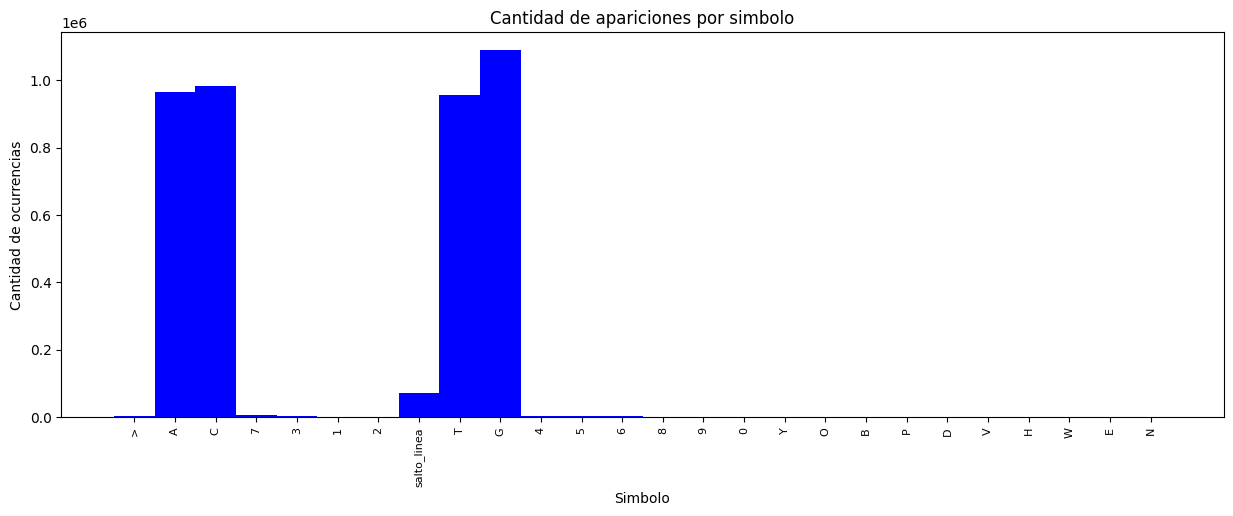

In [7]:
show_histogram(ecoli_fa_characters)

### Calculo de entropía en el archivo "ecoli.fa"

In [8]:
show_entropy(ecoli_fa_characters)

La entropía es de 2.1545 bits/simbolo


## Analisis de posible tasa de compresión en el archivo "ecoli.fa"

Similar al texto anterior tenemos un texto donde **la entropía del mismo es de 2.1545 bits/símbolo, significa que en promedio cada carácter del mismo podría representarse con ~4.83 bits en lugar de 8 bits que necesita un caracter en ASCII.**

Por lo tanto podemos suponer que la tasa de compresión será:

```
Tasa de compresión = 2.15 (bits / simbolo) / 8 bits / simbolo
```

Lo que nos dá una tasa de compresión teórica de **0.26875**. Con lo cual en un esquema de compresión óptimo con el 26.8% de la información original podríamos representar el archivo sin pérdidas.

**En realidad tenemos un texto con 25 caracteres, que se pueden presentar con en 5 bits**, o sea 2^5.

Por lo cual nuestro cálculo "más realista" de una teórica tasa de compresión es de:

```
Tasa de compresión = 2.15 (bits / simbolo) / 5 bits / simbolo
```

Lo que nos dá una tasa de compresión teórica de **0.43**. Con lo cual en un esquema de compresión óptimo con el 43% de la información original podríamos representar el archivo sin pérdidas.

# Parte 2: Análisis de Imágenes en Formato RAW

In [9]:
# 64 x 64 pixeles
ROWS = COLS = 64

### Analisis de imagen_1.raw

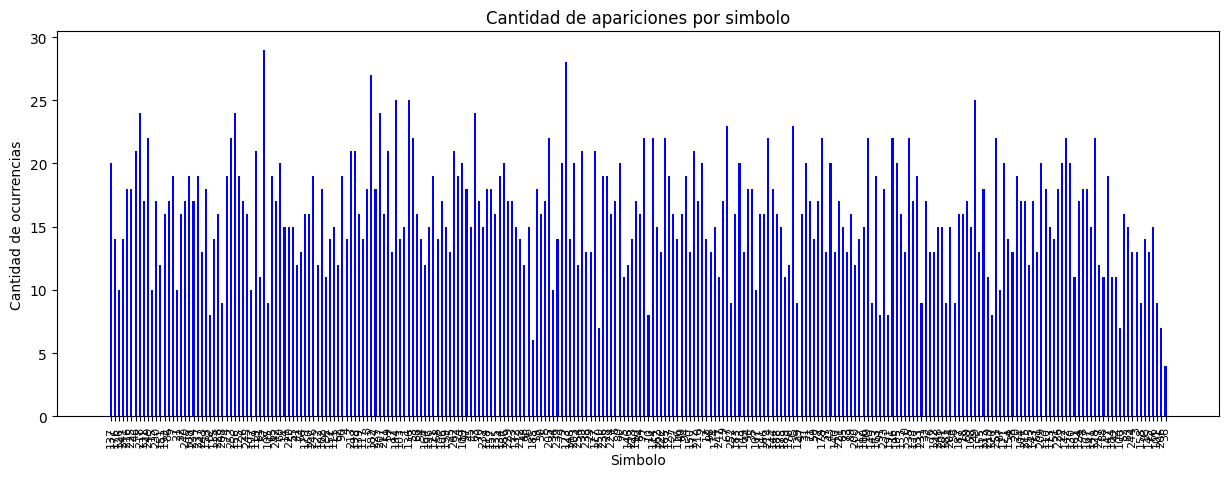

Tenemos en total 4096 caracteres y simbolos y 256 caracteres y simbolos diferentes en el mismo

Tabla con la frecuencia de aparición de cada caracteres y simbolos:

La entropía es de 7.9474 bits/simbolo


In [10]:
imagen_1 = get_pixels_from_img("imagen_1.raw", ROWS, COLS)
# Histograma
show_histogram(imagen_1, width=0.5)
# Tabla de frecuencias
print_frec_table(imagen_1)
# Cálculo de entropia
show_entropy(imagen_1)

### Analisis de imagen_2.raw

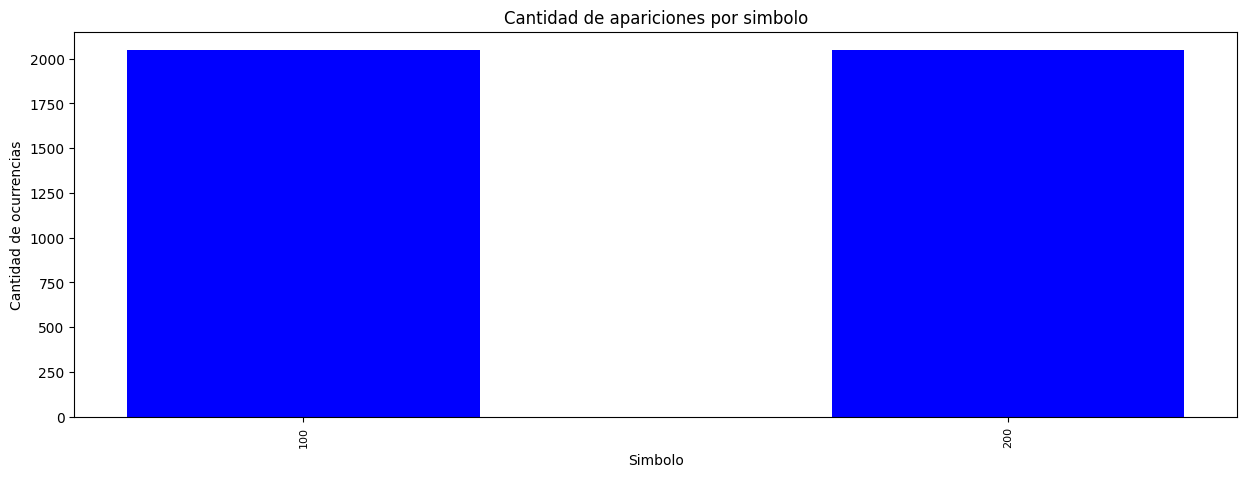

Tenemos en total 4096 caracteres y simbolos y 2 caracteres y simbolos diferentes en el mismo

Tabla con la frecuencia de aparición de cada caracteres y simbolos:

La entropía es de 1.0000 bits/simbolo


In [11]:
imagen_2 = get_pixels_from_img("imagen_2.raw", ROWS, COLS)
# Histograma
show_histogram(imagen_2, width=0.5)
# Tabla de frecuencias
print_frec_table(imagen_2)
# Calculo de entropia
show_entropy(imagen_2)

### Analisis de imagen_3.raw

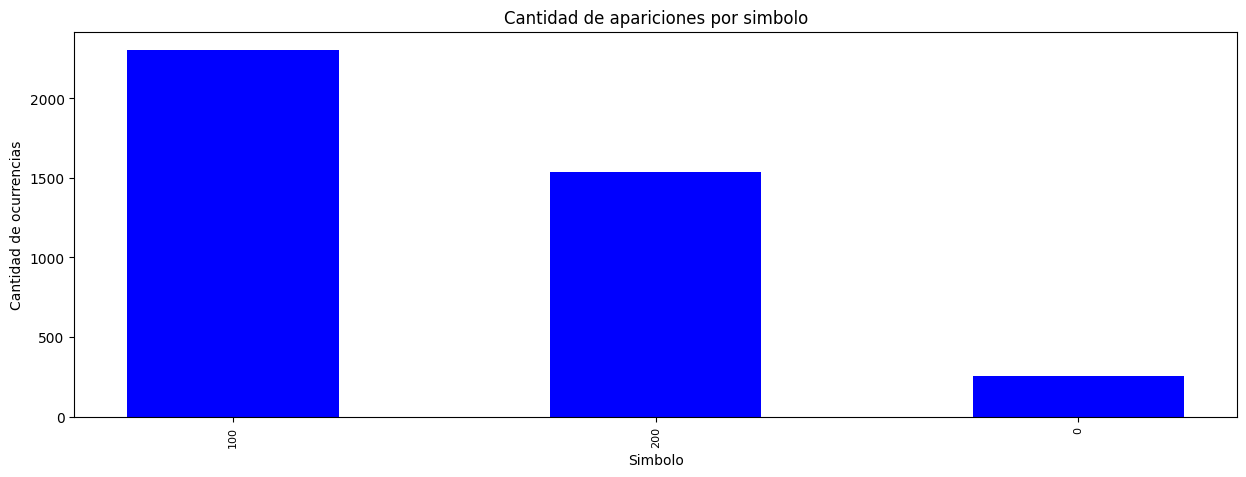

Tenemos en total 4096 caracteres y simbolos y 3 caracteres y simbolos diferentes en el mismo

Tabla con la frecuencia de aparición de cada caracteres y simbolos:

La entropía es de 1.2476 bits/simbolo


In [12]:
imagen_3 = get_pixels_from_img("imagen_3.raw", ROWS, COLS)
# Histograma
show_histogram(imagen_3, width=0.5)
# Tabla de frecuencias
print_frec_table(imagen_3)
# Calculo de entropia
show_entropy(imagen_3)

### Analisis de imagen_4.raw

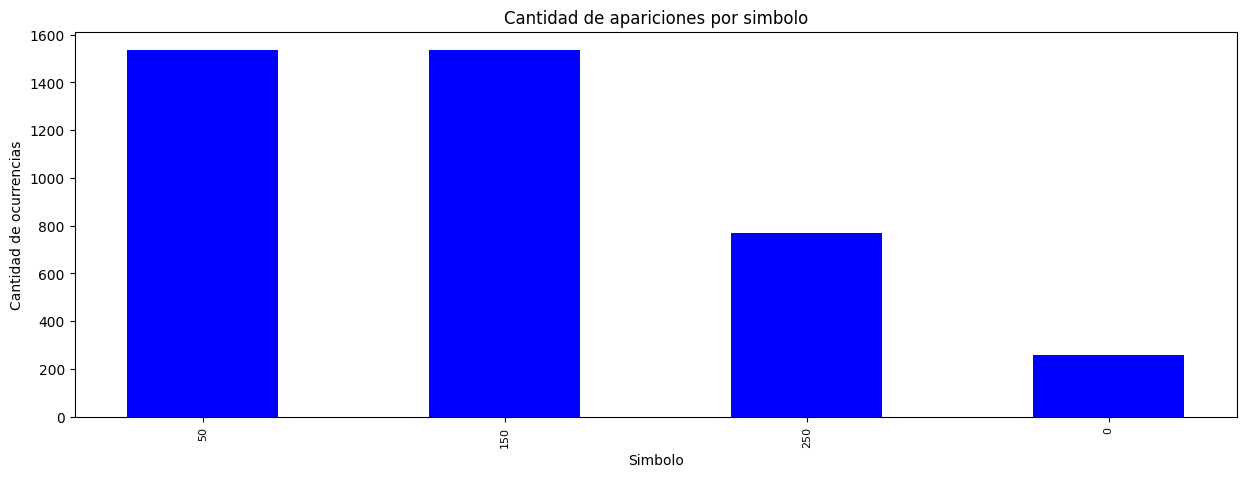

Tenemos en total 4096 caracteres y simbolos y 4 caracteres y simbolos diferentes en el mismo

Tabla con la frecuencia de aparición de cada caracteres y simbolos:

La entropía es de 1.7641 bits/simbolo


In [13]:
imagen_4 = get_pixels_from_img("imagen_4.raw", ROWS, COLS)
# Histograma
show_histogram(imagen_4, width=0.5)
# Tabla de frecuencias
print_frec_table(imagen_4)
# Calculo de entropia
show_entropy(imagen_4)

### Analisis de imagen_5.raw

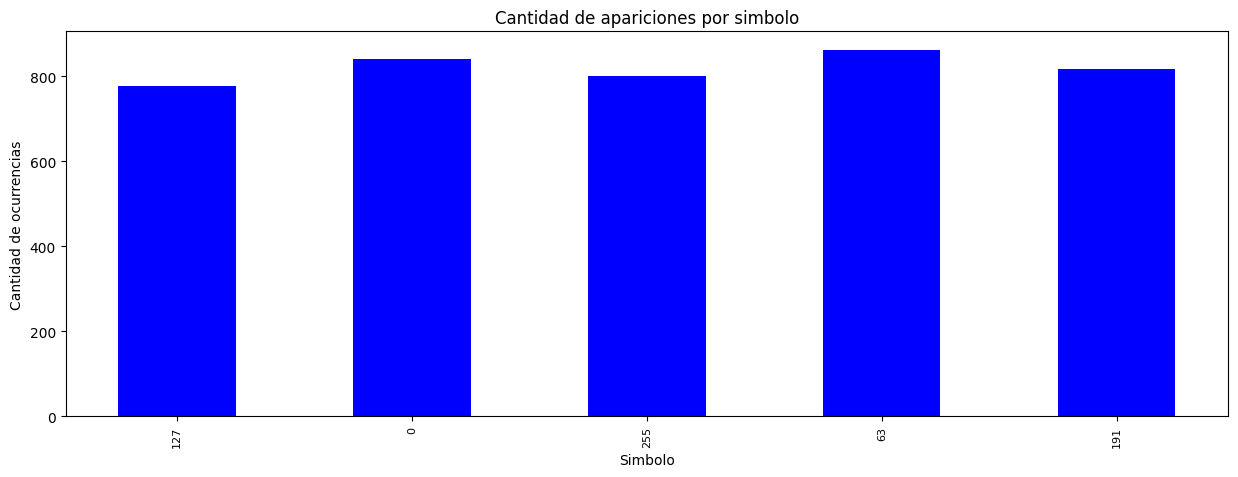

Tenemos en total 4096 caracteres y simbolos y 5 caracteres y simbolos diferentes en el mismo

Tabla con la frecuencia de aparición de cada caracteres y simbolos:

La entropía es de 2.3210 bits/simbolo


In [14]:
imagen_5 = get_pixels_from_img("imagen_5.raw", ROWS, COLS)
# Histograma
show_histogram(imagen_5, width=0.5)
# Tabla de frecuencias
print_frec_table(imagen_5)
# Calculo de entropia
show_entropy(imagen_5)

### Analisis de imagen_6.raw

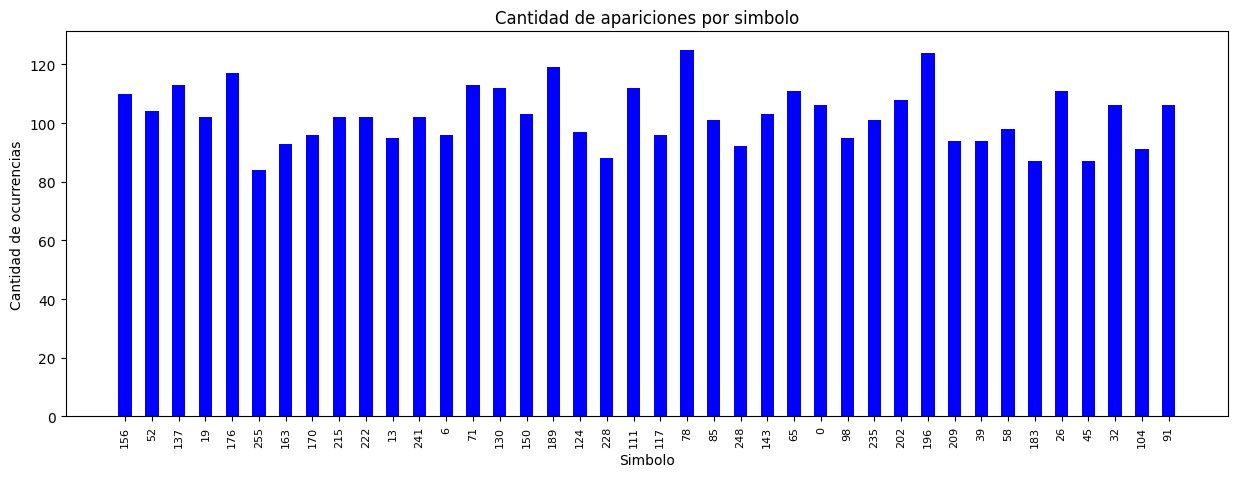

Tenemos en total 4096 caracteres y simbolos y 40 caracteres y simbolos diferentes en el mismo

Tabla con la frecuencia de aparición de cada caracteres y simbolos:

La entropía es de 5.3152 bits/simbolo


In [15]:
imagen_6 = get_pixels_from_img("imagen_6.raw", ROWS, COLS)
# Histograma
show_histogram(imagen_6, width=0.5)
# Tabla de frecuencias
print_frec_table(imagen_6)
# Calculo de entropia
show_entropy(imagen_6)

## Analisis de compresión de Imágenes en Formato RAW

Similar a los análisis de texto anteriores, tenemos archivos con diferentes entropías bits/símbolo.

Usando la misma metodología necesitaremos 8 bits/simbolo para representar todos los valores de pixel (de 0 a 255).

Para cada archivo de imagen en formato RAW el análisis de compresión será:

- Tasa de compresión para archivo **imagen_1.raw:** 7.9474 bits/simbolo / 8 bits/simbolo => **0.993**, o sea con el 99.3% de la información original podríamos representar el archivo sin pérdidas.
- Tasa de compresión para archivo **imagen_2.raw:** 1 bits/simbolo / 8 bits/simbolo => **0.125**, o sea con el 12.5% de la información original podríamos representar el archivo sin pérdidas.
- Tasa de compresión para archivo **imagen_3.raw:** 1.2476 bits/simbolo / 8 bits/simbolo => **0.156**, o sea con el 15.6% de la información original podríamos representar el archivo sin pérdidas.
- Tasa de compresión para archivo **imagen_4.raw:** 1.7641 bits/simbolo / 8 bits/simbolo => **0.22**, o sea con el 22% de la información original podríamos representar el archivo sin pérdidas.
- Tasa de compresión para archivo **imagen_5.raw:** 2.321 bits/simbolo / 8 bits/simbolo => **0.29**, o sea con el 29% de la información original podríamos representar el archivo sin pérdidas.
- Tasa de compresión para archivo **imagen_6.raw:** 5.3152 bits/simbolo / 8 bits/simbolo => **0.66**, o sea con el 66% de la información original podríamos representar el archivo sin pérdidas.